In [1]:
import kagglehub
redwankarimsony_auto_insurance_in_sweden_path = kagglehub.dataset_download('redwankarimsony/auto-insurance-in-sweden')

print('Data source import complete.')

100%|██████████| 438/438 [00:00<00:00, 716kB/s]

Extracting files...
Data source import complete.


---

Este é um tutorial muito simples, destinado a iniciantes para entender e implementar a Regressão Linear Simples do zero.

<font color='blue'> Regressão Linear Simples </font> é um ótimo primeiro algoritmo de aprendizado de máquina para implementar, pois requer que você estime propriedades do seu conjunto de dados de treinamento, mas é simples o suficiente para iniciantes entenderem. A regressão linear é um método de previsão com mais de 200 anos. Neste tutorial, você descobrirá como implementar o algoritmo de regressão linear simples do zero em Python.

Depois de concluir este tutorial, você saberá:<br>
&#9632; Como estimar estatísticas a partir de dados de treinamento.<br>
&#9632; Como estimar coeficientes de regressão linear a partir de dados.<br>
&#9632; Como fazer previsões usando regressão linear para novos dados.<br>

A regressão linear pressupõe uma **relação linear ou de linha reta entre as variáveis ​​de entrada (X) e a variável de saída única (y).** Mais especificamente, essa saída (y) pode ser calculada a partir de uma combinação linear das variáveis ​​de entrada (X). Quando há uma única variável de entrada, o método é chamado de regressão linear simples.

Na regressão linear simples, podemos usar estatísticas nos dados de treinamento para estimar os coeficientes exigidos pelo modelo para fazer previsões em novos dados.

A linha para um modelo de regressão linear simples pode ser escrita como:

$$ y = b_0 + b_1 * x $$
onde $b_0$ e $b_1$ são os coeficientes que devemos estimar a partir dos dados de treinamento. Uma vez que os coeficientes são conhecidos, podemos usar esta equação para estimar valores de saída para $y$ dados novos exemplos de entrada de $x$. Ela requer que você calcule propriedades estatísticas a partir dos dados, como **média, variância** e **covariância.**

## <font color = 'blue'> Conjunto de dados de seguros suecos</font>
Usaremos um conjunto de dados real para demonstrar a regressão linear simples. O conjunto de dados é chamado de conjunto de dados **“Seguro de automóveis na Suécia”** e envolve **<font color='blue'> prever o pagamento total de todas as reivindicações em milhares de coroas suecas (y), dado o número total de reivindicações (x). </font>**

Isso significa que, para um novo número de reivindicações (x), seremos capazes de prever o pagamento total de reivindicações (y).

Vamos carregar algumas bibliotecas básicas do Python que precisaremos ao longo deste tutorial.

In [2]:
# library for manipulating the csv data
import pandas as pd

# library for scientific calculations on numbers + linear algebra
import numpy as np
import math

# library for regular plot visualizations
import matplotlib.pyplot as plt

#library for responsive visualizations
import plotly.express as px


In [3]:
data = pd.read_csv(redwankarimsony_auto_insurance_in_sweden_path + "/swedish_insurance.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       63 non-null     int64  
 1   Y       63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [4]:
print(data.columns)
data.head(10)

Index(['X', 'Y'], dtype='object')


,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
5,57,170.9
6,23,56.9
7,14,77.5
8,45,214.0
9,10,65.3


Vamos dar uma olhada nos dados em si. Você pode usar matplotlib.pyplot ou plotly para visualização.

### Plot a distribuição da coluna X usando o box plot da lib plotly

In [5]:
graph = px.box(data, x="X")
graph.show()

### Plot a distribuição da coluna Y usando o box plot da lib plotly

In [6]:
graph = px.box(data, y="Y")
graph.show()

### Faça o plot da dispersão entre a variável X e Y para verificar o relacionamento entre variável independente e variável dependente (continue utilizando a lib plotly)

In [7]:
scatter = px.scatter(data, x="X", y="Y")
scatter.show()

## Este treinamento é dividido em cinco partes:
* Calcular média e variância.
* Calcular covariância (X,Y).
* Estimar coeficientes.
* Fazer previsões.
* Comparação visual para correção.

Essas etapas darão a você a base necessária para implementar e treinar modelos de regressão linear simples para seus próprios problemas de previsão.

### 1. Calcular Média e Variância.
Como dito anteriormente, a regressão linear simples usa média e variância dos dados fornecidos. Usaremos as funções internas `numpy` para calculá-las.

In [8]:
pd.set_option('display.max_rows', None)
print(data)

      X      Y
0   108  392.5
1    19   46.2
2    13   15.7
3   124  422.2
4    40  119.4
5    57  170.9
6    23   56.9
7    14   77.5
8    45  214.0
9    10   65.3
10    5   20.9
11   48  248.1
12   11   23.5
13   23   39.6
14    7   48.8
15    2    6.6
16   24  134.9
17    6   50.9
18    3    4.4
19   23  113.0
20    6   14.8
21    9   48.7
22    9   52.1
23    3   13.2
24   29  103.9
25    7   77.5
26    4   11.8
27   20   98.1
28    7   27.9
29    4   38.1
30    0    0.0
31   25   69.2
32    6   14.6
33    5   40.3
34   22  161.5
35   11   57.2
36   61  217.6
37   12   58.1
38    4   12.6
39   16   59.6
40   13   89.9
41   60  202.4
42   41  181.3
43   37  152.8
44   55  162.8
45   41   73.4
46   11   21.3
47   27   92.6
48    8   76.1
49    3   39.9
50   17  142.1
51   13   93.0
52   13   31.9
53   15   32.1
54    8   55.6
55   29  133.3
56   30  194.5
57   24  137.9
58    9   87.4
59   31  209.8
60   14   95.5
61   53  244.6
62   26  187.5


In [13]:
# Faça o cálculo da média e variância para as variáveis X e Y aqui.

    # Faz a Média dos eixos

x_media = np.average(data['X'])
print('X média:', x_media)

y_media = np.average(data['Y'])
print('Y média:', y_media)


# Variância X

data_x = []

for i in data['X']:
    x_value = np.power((i-x_media),2)
    data_x.append(x_value)

x_var = sum(data_x) / len(data_x)

print('X variância:', x_var)

# Variância Y

y_data = []

for i in data['Y']:
    y_value = np.power((i-y_media), 2)
    y_data.append(y_value)

y_var = sum(y_data) / len(y_data)

print('Y variância:', y_var)


X média: 22.904761904761905
Y média: 98.18730158730159
X variância: 536.6575963718822
Y variância: 7505.052219702693


### 2. Calcule a covariância.
A covariância de dois grupos descreve como esses grupos mudam juntos. A covariância é uma generalização da correlação. A correlação descreve a relação entre dois grupos de dados, enquanto a covariância pode descrever a relação entre dois ou mais grupos de dados. Ela é calculada pela seguinte fórmula.
$$ Cov(X,Y) = \frac{\sum{(X_i - \overline{X})}{(Y_j - \overline{Y})}}{n} $$

In [21]:
# Faça o cálculo da covariância entre X e Y aqui.

x_data = np.zeros(len(data['X']))

for j,i in enumerate(data['X']):
    x_value = i-x_media
    x_data[j] = x_value

y_data = np.zeros(len(data['Y']))

for j,i in enumerate(data['Y']):
    y_value = i-y_media
    y_data[j] = y_value

cov = (sum(x_data * y_data)) / (len(x_data))

print('Covariância', cov)



Covariância 1832.0543461829182


### 3. Estimar coeficientes
Agora que temos todas as variáveis necessárias para calcular os coeficientes (parâmetros) de uma regressão linear simples, vamos em frente para estimar esses parâmetros (b1 e b0);

### Fórmulas para os parâmetros da regressão linear simples

1. **Cálculo do coeficiente angular $b_1$:**

$$
b_1 = \frac{\sum{(x_i - \overline{x})(y_i - \overline{y})}}{\sum{(x_i - \overline{x})^2}}
$$

ou, equivalente:

$$
b_1 = \frac{Cov(X, Y)}{Var(X)}
$$

2. **Cálculo do intercepto $b_0$:**

$$
b_0 = \overline{y} - b_1 \cdot \overline{x}
$$

### Onde:
- $x_i$: valores da variável independente $x$,
- $y_i$: valores da variável dependente $y$,
- $\overline{x}$: média dos valores de $x$,
- $\overline{y}$: média dos valores de $y$,
- $Cov(X, Y)$: covariância entre $X$ e $Y$,
  - $$ Cov(X,Y) = \frac{\sum{(x_i - \overline{x})(y_i - \overline{y})}}{n} $$
- $Var(X)$: variância de $X$,
  - $$ Var(X) = \frac{\sum{(x_i - \overline{x})^2}}{n} $$


In [23]:
# Estime os valores para os parâmetros b1 e b0 aqui com base nas estatísticas calculadas anteriormente

    #Coeficiente Angular
b1 = cov / x_var
print('Coeficiente Angular:', b1)

print('-' * 35)

    #Intercepto
b0 = y_media - (b1 * x_media)
print('Intercepto:', b0)

Coeficiente Angular: 3.413823560066367
-----------------------------------
Intercepto: 19.99448575911481


### 4. Faça previsões
O modelo de regressão linear simples é uma reta definida por coeficientes estimados a partir de dados de treinamento. Uma vez que os coeficientes são estimados, podemos usá-los para fazer previsões. A equação para fazer previsões com um modelo de regressão linear simples é a seguinte:
$$ \hat{y} = b_0 + b_1 * x $$

In [24]:
# Calcule as predições aqui com base na variável X do nosso conjunto de dados.

prv = b0 + (b1 * data['X'])
print(prv)


0     388.687430
1      84.857133
2      64.374192
3     443.308607
4     156.547428
5     214.582429
6      98.512428
7      67.788016
8     173.616546
9      54.132721
10     37.063604
11    183.858017
12     57.546545
13     98.512428
14     43.891251
15     26.822133
16    101.926251
17     40.477427
18     30.235956
19     98.512428
20     40.477427
21     50.718898
22     50.718898
23     30.235956
24    118.995369
25     43.891251
26     33.649780
27     88.270957
28     43.891251
29     33.649780
30     19.994486
31    105.340075
32     40.477427
33     37.063604
34     95.098604
35     57.546545
36    228.237723
37     60.960368
38     33.649780
39     74.615663
40     64.374192
41    224.823899
42    159.961252
43    146.305957
44    207.754782
45    159.961252
46     57.546545
47    112.167722
48     47.305074
49     30.235956
50     78.029486
51     64.374192
52     64.374192
53     71.201839
54     47.305074
55    118.995369
56    122.409193
57    101.926251
58     50.7188

### 5. Visualizando as predições como uma regressão linear

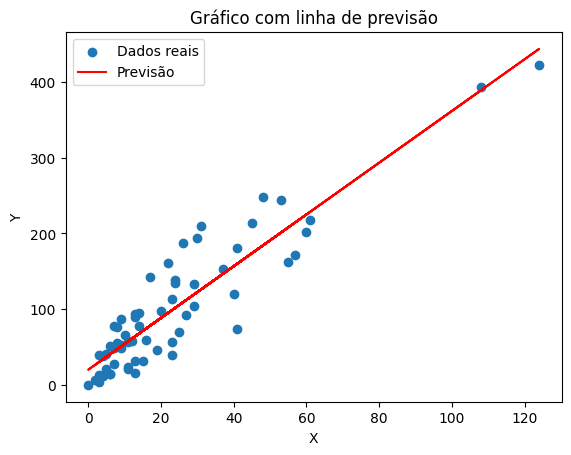

In [27]:
# Plot a regressão linear estimada aqui usando o plotly
reg = plt.scatter(data['X'], data['Y'], label='Dados reais')

plt.plot(data['X'], prv, color='red', label='Previsão')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico com linha de previsão')
plt.legend()
plt.show()

## Para onde ir a partir daqui (extra)
* <font color="red">Você consegue descobrir precisão das previsões (RMSE e MSE)???</font>
* Estender o mesmo problema para vários recursos de entrada.

In [26]:
#MSE e RMSE
data_array = []
for i, j in zip(data['Y'], prv):
    value = np.power((i-j),2)
    data_array.append(value)

mse = sum(data_array) / len(data_array)
print('MSE:', mse)

rmse = np.sqrt(mse)
print('RMSE:', rmse)


MSE: 1250.7419293814687
RMSE: 35.365829968791466
